In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('./Mall_Customers.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [3]:
df.duplicated().sum()

0

In [4]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [5]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
from sklearn.preprocessing import LabelEncoder

label=LabelEncoder()

for col in df.columns:
    if df[col].dtype == 'object':
        df[col]=label.fit_transform(df[col])
        
df=df.drop( 'Annual Income (k$)' , axis=1)
df.head()

,CustomerID,Gender,Age,Spending Score (1-100)
0,1,1,19,39
1,2,1,21,81
2,3,0,20,6
3,4,0,23,77
4,5,0,31,40


In [7]:
import seaborn as sns 

df1=df.drop('CustomerID' , axis= 1)



<Axes: >

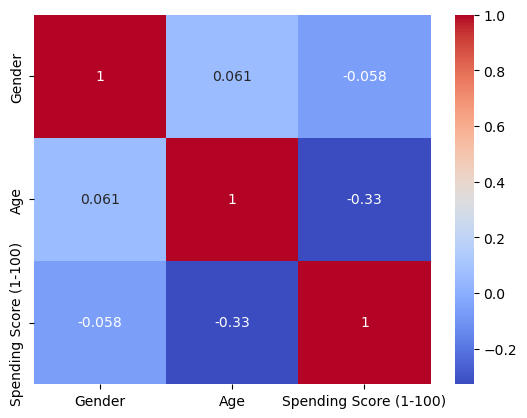

In [8]:
sns.heatmap(data=df1.corr() , cmap='coolwarm' , annot=True)

In [9]:
df.head()

,CustomerID,Gender,Age,Spending Score (1-100)
0,1,1,19,39
1,2,1,21,81
2,3,0,20,6
3,4,0,23,77
4,5,0,31,40


In [10]:
X = df.values[: , 1:]
X

array([[ 1, 19, 39],
       [ 1, 21, 81],
       [ 0, 20,  6],
       [ 0, 23, 77],
       [ 0, 31, 40],
       [ 0, 22, 76],
       [ 0, 35,  6],
       [ 0, 23, 94],
       [ 1, 64,  3],
       [ 0, 30, 72],
       [ 1, 67, 14],
       [ 0, 35, 99],
       [ 0, 58, 15],
       [ 0, 24, 77],
       [ 1, 37, 13],
       [ 1, 22, 79],
       [ 0, 35, 35],
       [ 1, 20, 66],
       [ 1, 52, 29],
       [ 0, 35, 98],
       [ 1, 35, 35],
       [ 1, 25, 73],
       [ 0, 46,  5],
       [ 1, 31, 73],
       [ 0, 54, 14],
       [ 1, 29, 82],
       [ 0, 45, 32],
       [ 1, 35, 61],
       [ 0, 40, 31],
       [ 0, 23, 87],
       [ 1, 60,  4],
       [ 0, 21, 73],
       [ 1, 53,  4],
       [ 1, 18, 92],
       [ 0, 49, 14],
       [ 0, 21, 81],
       [ 0, 42, 17],
       [ 0, 30, 73],
       [ 0, 36, 26],
       [ 0, 20, 75],
       [ 0, 65, 35],
       [ 1, 24, 92],
       [ 1, 48, 36],
       [ 0, 31, 61],
       [ 0, 49, 28],
       [ 0, 24, 65],
       [ 0, 50, 55],
       [ 0, 2

In [11]:
from sklearn.preprocessing import StandardScaler , MinMaxScaler

scaler = MinMaxScaler()
X=scaler.fit_transform(X)
X

array([[1.        , 0.01923077, 0.3877551 ],
       [1.        , 0.05769231, 0.81632653],
       [0.        , 0.03846154, 0.05102041],
       [0.        , 0.09615385, 0.7755102 ],
       [0.        , 0.25      , 0.39795918],
       [0.        , 0.07692308, 0.76530612],
       [0.        , 0.32692308, 0.05102041],
       [0.        , 0.09615385, 0.94897959],
       [1.        , 0.88461538, 0.02040816],
       [0.        , 0.23076923, 0.7244898 ],
       [1.        , 0.94230769, 0.13265306],
       [0.        , 0.32692308, 1.        ],
       [0.        , 0.76923077, 0.14285714],
       [0.        , 0.11538462, 0.7755102 ],
       [1.        , 0.36538462, 0.12244898],
       [1.        , 0.07692308, 0.79591837],
       [0.        , 0.32692308, 0.34693878],
       [1.        , 0.03846154, 0.66326531],
       [1.        , 0.65384615, 0.28571429],
       [0.        , 0.32692308, 0.98979592],
       [1.        , 0.32692308, 0.34693878],
       [1.        , 0.13461538, 0.73469388],
       [0.

In [12]:
from sklearn.cluster import KMeans

wcss = []
for k in range(1 , 15):
    k_means=KMeans(n_clusters=k , random_state=42)
    k_means.fit(X)
    wcss.append(k_means.inertia_)
wcss 

c:\Users\microsoft\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\microsoft\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\microsoft\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\microsoft\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memor

[77.45833784431538,
 28.07847675601458,
 20.438539634634203,
 17.835983992684703,
 10.675440297207926,
 8.800990895197936,
 7.2810136835305626,
 6.933557336051187,
 5.416887488807564,
 5.1576666081026925,
 4.610961740202858,
 3.8694317402946874,
 3.650749918453526,
 3.1779391705096454]

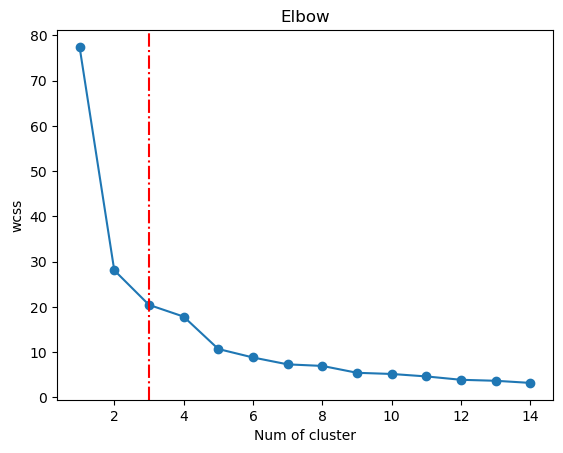

In [13]:
import matplotlib.pyplot as plt 

plt.plot(range(1,15) , wcss , '-' , marker='o')
plt.axvline(x=3,color='red' , label='Elbow Point' , linestyle='-.')
plt.title('Elbow')
plt.xlabel('Num of cluster')
plt.ylabel('wcss')
plt.show()

# KMeans

In [14]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

kmeans = KMeans(n_clusters=3, random_state=42 , init="k-means++" , n_init=12)
kmeans_pred = kmeans.fit_predict(X)


silhouette_avg = silhouette_score(X, kmeans_pred)
print(f"Silhouette Score: {silhouette_avg}")



Silhouette Score: 0.5405259249650971


c:\Users\microsoft\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [15]:
df['Cluster'] = kmeans_pred

df['Gender']=df['Gender'].replace({1:'Male' , 0:'Female'})

df.head(10)

,CustomerID,Gender,Age,Spending Score (1-100),Cluster
0,1,Male,19,39,0
1,2,Male,21,81,0
2,3,Female,20,6,1
3,4,Female,23,77,1
4,5,Female,31,40,1
5,6,Female,22,76,1
6,7,Female,35,6,1
7,8,Female,23,94,1
8,9,Male,64,3,2
9,10,Female,30,72,1


In [16]:
df.to_csv('./Submission_K-means.csv' , index=False)

# DBSCAN

In [17]:
from sklearn.cluster import DBSCAN
from sklearn.model_selection import GridSearchCV
import numpy as np 


def silhouette_scorer(estimator, X):
    dbscan_pred = estimator.fit_predict(X)
    if len(set(dbscan_pred)) > 1:
        return silhouette_score(X, dbscan_pred)
    else:
        return -1

param_grid = {
    'eps': np.arange(0.1, 1.0, 0.1),
    'min_samples': np.arange(1 , 10 , 1)
}

dbscan = DBSCAN()

grid_search_dbscan = GridSearchCV(estimator=dbscan, param_grid=param_grid, scoring=silhouette_scorer, cv=4)
grid_search_dbscan.fit(X)

GridSearchCV(cv=4, estimator=DBSCAN(),
             param_grid={'eps': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                         'min_samples': array([1, 2, 3, 4, 5, 6, 7, 8, 9])},
             scoring=<function silhouette_scorer at 0x000001C0BD64CEA0>)

In [18]:
grid_search_dbscan.best_estimator_

DBSCAN(eps=0.4, min_samples=1)

In [19]:
db=DBSCAN(eps=0.4 , min_samples=1)
db.fit(X)

DBSCAN(eps=0.4, min_samples=1)

In [20]:
db_pred=db.fit_predict(X)
silhouette_score(X ,db_pred)

0.5822717092134735

In [21]:
db_pred

array([0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 0], dtype=int64)

In [22]:
df=df.drop('Cluster' , axis=1)
df.head()

,CustomerID,Gender,Age,Spending Score (1-100)
0,1,Male,19,39
1,2,Male,21,81
2,3,Female,20,6
3,4,Female,23,77
4,5,Female,31,40


In [23]:
df['DBSCAN']=db_pred

df['Gender']=df['Gender'].replace({1:'Male' , 0:'Female'})

df.head()

,CustomerID,Gender,Age,Spending Score (1-100),DBSCAN
0,1,Male,19,39,0
1,2,Male,21,81,0
2,3,Female,20,6,1
3,4,Female,23,77,1
4,5,Female,31,40,1


In [24]:
df.to_csv('./Submission_DBSCAN.csv', index=False)